# Recurrent Neural Network 

**Recurrent Neural Network (RNN) is a type of neural network that can process sequential data, such as stock prices over time. However, there is no one-size-fits-all formula for predicting stock prices using RNNs**

Here's a basic approach to build an RNN model for stock price prediction:

  (1) Prepare the data: Gather historical stock price data and split it into training and testing sets. Normalize the data to a common scale.

  (2) Define the architecture: Create an RNN model with an input layer, one or more hidden layers, and an output layer. You can choose the number of neurons in the hidden layers and the activation function to use.

  (3) Train the model: Use the training data to train the model. The RNN will process the data sequence one step at a time, making predictions for each time step. The model is updated with each time step to improve its predictions.

  (4) Evaluate the model: Use the testing data to evaluate the model's performance. You can use metrics like mean squared error or root mean squared error to measure how well the model is predicting future stock prices.

  (5) Make predictions: Once the model is trained and evaluated, you can use it to make predictions on new data. Feed in new stock price data, and the RNN will output predicted values for future time steps

In [1]:
!pip install getFamaFrenchFactors

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from datetime import datetime

In [3]:
TSLA = 'TSLA'
start_date = datetime(2018,1,1)
end_date = datetime(2022,12,31)
df = yf.download(TSLA,start_date,end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02 00:00:00-05:00,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
2018-01-03 00:00:00-05:00,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2018-01-04 00:00:00-05:00,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
2018-01-05 00:00:00-05:00,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
2018-01-08 00:00:00-05:00,21.066668,22.468000,21.033333,22.427334,22.427334,147891000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-01-02 00:00:00-05:00 to 2022-12-30 00:00:00-05:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 101.1 KB


In [6]:
train_length = round(len(df)*0.7)
lg = len(df)
val_length = lg-train_length

print('Total observations:',lg)
print('Training set:', train_length)
print('Validation set:', val_length)

Total observations: 1259
Training set: 881
Validation set: 378


In [7]:
train_data = df['Open'][:train_length,]
val_data = df['Open'][train_length:,]

In [8]:
val_data

Date
2021-07-02 00:00:00-04:00    226.326660
2021-07-06 00:00:00-04:00    227.236664
2021-07-07 00:00:00-04:00    221.423340
2021-07-08 00:00:00-04:00    209.456665
2021-07-09 00:00:00-04:00    217.726669
                                ...    
2022-12-23 00:00:00-05:00    126.370003
2022-12-27 00:00:00-05:00    117.500000
2022-12-28 00:00:00-05:00    110.349998
2022-12-29 00:00:00-05:00    120.389999
2022-12-30 00:00:00-05:00    119.949997
Name: Open, Length: 378, dtype: float64

In [9]:
train_data

Date
2018-01-02 00:00:00-05:00     20.799999
2018-01-03 00:00:00-05:00     21.400000
2018-01-04 00:00:00-05:00     20.858000
2018-01-05 00:00:00-05:00     21.108000
2018-01-08 00:00:00-05:00     21.066668
                                ...    
2021-06-25 00:00:00-04:00    229.860001
2021-06-28 00:00:00-04:00    223.880005
2021-06-29 00:00:00-04:00    228.216660
2021-06-30 00:00:00-04:00    226.589996
2021-07-01 00:00:00-04:00    227.973328
Name: Open, Length: 881, dtype: float64

In [10]:
train=train_data.values.reshape(-1,1)
train

array([[ 20.79999924],
       [ 21.39999962],
       [ 20.8579998 ],
       [ 21.1079998 ],
       [ 21.06666756],
       [ 22.34399986],
       [ 22.14666748],
       [ 22.34933281],
       [ 22.57533264],
       [ 22.50266647],
       [ 22.69799995],
       [ 23.04466629],
       [ 23.        ],
       [ 23.29333305],
       [ 24.        ],
       [ 23.63866615],
       [ 23.21800041],
       [ 22.76666641],
       [ 22.65666771],
       [ 23.00933266],
       [ 23.1673336 ],
       [ 23.39999962],
       [ 23.22933388],
       [ 22.53133392],
       [ 21.68066788],
       [ 22.59933281],
       [ 22.88733292],
       [ 21.32866669],
       [ 21.07533264],
       [ 21.00133324],
       [ 21.38933372],
       [ 21.63333321],
       [ 22.16666794],
       [ 22.29800034],
       [ 22.40200043],
       [ 22.3686676 ],
       [ 23.1886673 ],
       [ 23.56666756],
       [ 23.75      ],
       [ 23.50466728],
       [ 23.00066757],
       [ 21.79866791],
       [ 22.15933228],
       [ 22

In [11]:
# Normalization
# Scale the data between the range [0,1]

scaler = MinMaxScaler()
scaled_trainset = scaler.fit_transform(train)

In [12]:
scaled_trainset

array([[3.06141520e-02],
       [3.27190225e-02],
       [3.08176247e-02],
       [3.16946535e-02],
       [3.15496552e-02],
       [3.60306842e-02],
       [3.53384194e-02],
       [3.60493928e-02],
       [3.68422263e-02],
       [3.65873050e-02],
       [3.72725573e-02],
       [3.84887028e-02],
       [3.83320083e-02],
       [3.93610545e-02],
       [4.18401236e-02],
       [4.05725228e-02],
       [3.90967789e-02],
       [3.75134472e-02],
       [3.71275590e-02],
       [3.83647483e-02],
       [3.89190339e-02],
       [3.97352531e-02],
       [3.91365380e-02],
       [3.66878737e-02],
       [3.37036391e-02],
       [3.69264216e-02],
       [3.79367592e-02],
       [3.24687784e-02],
       [3.15800533e-02],
       [3.13204549e-02],
       [3.26816053e-02],
       [3.35375836e-02],
       [3.54085834e-02],
       [3.58693125e-02],
       [3.62341569e-02],
       [3.61172215e-02],
       [3.89938749e-02],
       [4.03199434e-02],
       [4.09630948e-02],
       [4.01024393e-02],


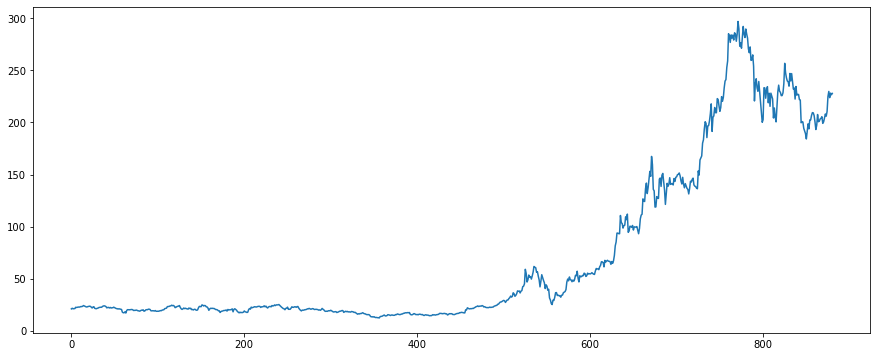

In [13]:
plt.subplots(figsize = (15,6))
plt.plot(train)
plt.show()

### For this model the first 35 values will be taken as the x values and 51st value will be used as the y value in the training data

In [14]:
x_train = []
y_train = []
step = 35

for i in range(step, train_length):
    x_train.append(scaled_trainset[i-step:i,0])
    y_train.append(scaled_trainset[i,0])

In [15]:
X_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
print(X_train.shape)
print(y_train.shape)

(846, 35)
(846,)


In [17]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
y_train.reshape(y_train.shape[0],1)

array([[3.61172215e-02],
       [3.89938749e-02],
       [4.03199434e-02],
       [4.09630948e-02],
       [4.01024393e-02],
       [3.83343502e-02],
       [3.41175968e-02],
       [3.53828490e-02],
       [3.57009218e-02],
       [3.37574230e-02],
       [3.54927720e-02],
       [3.34440340e-02],
       [3.44988078e-02],
       [3.44988078e-02],
       [3.64048828e-02],
       [3.46788947e-02],
       [3.31704041e-02],
       [3.16665906e-02],
       [3.12853729e-02],
       [3.02048714e-02],
       [3.10561793e-02],
       [3.04387489e-02],
       [2.95242962e-02],
       [2.87431590e-02],
       [1.95238311e-02],
       [1.76317875e-02],
       [1.75779970e-02],
       [2.07493375e-02],
       [1.67641130e-02],
       [2.53145619e-02],
       [2.80415399e-02],
       [2.78941997e-02],
       [2.75667726e-02],
       [2.79807303e-02],
       [2.83502518e-02],
       [2.86496093e-02],
       [2.75737850e-02],
       [2.52046389e-02],
       [2.57215005e-02],
       [2.57215005e-02],


In [18]:
print(X_train.shape)
print(y_train.shape)

(846, 35, 1)
(846,)


In [19]:
X_train[0].shape

(35, 1)

In [20]:
y_train[0]

0.036117221467479144

In [21]:
# RNN model
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [22]:
model = Sequential()

model.add(
    SimpleRNN(units = 35,return_sequences= True,input_shape = (X_train.shape[1],1)))

model.add(
    Dropout(0.2))

model.add(
    SimpleRNN(units = 35, return_sequences = True)
             )

model.add(
    Dropout(0.2)
             )

model.add(
    SimpleRNN(units = 35, return_sequences = True)
             )

model.add(
    Dropout(0.2)
             )

model.add(
    SimpleRNN(units = 35)
             )

model.add(
    Dropout(0.2)
             )

model.add(
    Dense(units = 1))

In [23]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 35, 35)            1295      
                                                                 
 dropout (Dropout)           (None, 35, 35)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 35, 35)            2485      
                                                                 
 dropout_1 (Dropout)         (None, 35, 35)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 35, 35)            2485      
                                                                 
 dropout_2 (Dropout)         (None, 35, 35)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 35)                2

In [25]:
history = model.fit(X_train, y_train, epochs = 50, batch_size =32)

Epoch 1/50
27/27 [==============================] - 3s 15ms/step - loss: 0.2961 - accuracy: 0.0024
Epoch 2/50
27/27 [==============================] - 0s 17ms/step - loss: 0.2120 - accuracy: 0.0024
Epoch 3/50
27/27 [==============================] - 0s 18ms/step - loss: 0.1333 - accuracy: 0.0024
Epoch 4/50
27/27 [==============================] - 0s 17ms/step - loss: 0.0949 - accuracy: 0.0024
Epoch 5/50
27/27 [==============================] - 0s 16ms/step - loss: 0.0756 - accuracy: 0.0024
Epoch 6/50
27/27 [==============================] - 0s 17ms/step - loss: 0.0646 - accuracy: 0.0012
Epoch 7/50
27/27 [==============================] - 0s 17ms/step - loss: 0.0487 - accuracy: 0.0012
Epoch 8/50
27/27 [==============================] - 0s 18ms/step - loss: 0.0451 - accuracy: 0.0012
Epoch 9/50
27/27 [==============================] - 0s 18ms/step - loss: 0.0378 - accuracy: 0.0024
Epoch 10/50
27/27 [==============================] - 0s 17ms/step - loss: 0.0364 - accuracy: 0.0024
Epoch 11/

# Evaluating a model

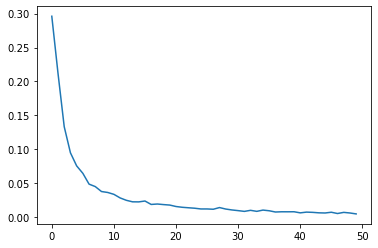

In [26]:
plt.plot(history.history['loss'])

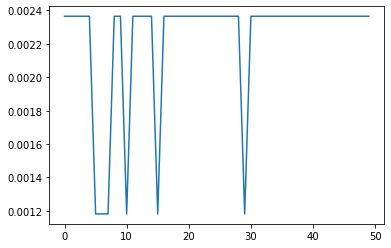

In [27]:
plt.plot(history.history['accuracy'])

In [28]:
y_pred = model.predict(X_train)
y_pred = scaler.inverse_transform(y_pred.reshape(1,-1))

27/27 [==============================] - 0s 5ms/step


In [29]:
y_pred

array([[ 21.406588 ,  21.831362 ,  22.266645 ,  22.775835 ,  23.49181  ,
         23.954905 ,  23.98783  ,  23.759665 ,  23.2771   ,  22.51434  ,
         21.963799 ,  21.492468 ,  20.899218 ,  20.640148 ,  20.734024 ,
         20.738594 ,  20.88071  ,  20.704937 ,  20.312582 ,  20.222935 ,
         19.915476 ,  19.85817  ,  19.99899  ,  19.763374 ,  19.496237 ,
         19.139864 ,  17.703753 ,  16.084583 ,  15.281046 ,  14.650249 ,
         14.456739 ,  15.278273 ,  16.854813 ,  18.08842  ,  18.639616 ,
         19.288385 ,  19.960646 ,  19.72012  ,  19.788633 ,  19.669016 ,
         19.517193 ,  19.487226 ,  19.339863 ,  18.786867 ,  18.168482 ,
         17.307804 ,  16.781107 ,  16.813354 ,  17.0706   ,  17.506266 ,
         17.833605 ,  17.892246 ,  17.951698 ,  18.478819 ,  18.898521 ,
         19.35444  ,  19.779947 ,  20.605698 ,  20.769781 ,  19.71696  ,
         18.974049 ,  18.641676 ,  17.713648 ,  17.222145 ,  17.234003 ,
         17.178993 ,  17.114788 ,  16.93468  ,  16.

In [30]:
y_train

array([3.61172215e-02, 3.89938749e-02, 4.03199434e-02, 4.09630948e-02,
       4.01024393e-02, 3.83343502e-02, 3.41175968e-02, 3.53828490e-02,
       3.57009218e-02, 3.37574230e-02, 3.54927720e-02, 3.34440340e-02,
       3.44988078e-02, 3.44988078e-02, 3.64048828e-02, 3.46788947e-02,
       3.31704041e-02, 3.16665906e-02, 3.12853729e-02, 3.02048714e-02,
       3.10561793e-02, 3.04387489e-02, 2.95242962e-02, 2.87431590e-02,
       1.95238311e-02, 1.76317875e-02, 1.75779970e-02, 2.07493375e-02,
       1.67641130e-02, 2.53145619e-02, 2.80415399e-02, 2.78941997e-02,
       2.75667726e-02, 2.79807303e-02, 2.83502518e-02, 2.86496093e-02,
       2.75737850e-02, 2.52046389e-02, 2.57215005e-02, 2.57215005e-02,
       2.66780475e-02, 2.57706139e-02, 2.42995471e-02, 2.39487343e-02,
       2.28378280e-02, 2.43860844e-02, 2.63132032e-02, 2.62898175e-02,
       2.74732229e-02, 2.28471890e-02, 2.38317989e-02, 2.72229721e-02,
       2.79947617e-02, 2.79035473e-02, 2.95617201e-02, 2.96084916e-02,
      

In [31]:
y_train = scaler.inverse_transform(y_train.reshape(1,-1))
y_train

array([[ 22.3686676 ,  23.1886673 ,  23.56666756,  23.75      ,
         23.50466728,  23.00066757,  21.79866791,  22.15933228,
         22.25      ,  21.69599915,  22.1906662 ,  21.60666656,
         21.90733337,  21.90733337,  22.45066643,  21.95866776,
         21.52866745,  21.10000038,  20.99133301,  20.68333244,
         20.9260006 ,  20.75      ,  20.4893322 ,  20.26666641,
         17.63866615,  17.09933281,  17.08399963,  17.98800087,
         16.85199928,  19.28933334,  20.06666756,  20.02466774,
         19.93133354,  20.04933357,  20.1546669 ,  20.23999977,
         19.93333244,  19.25799942,  19.40533257,  19.40533257,
         19.6779995 ,  19.4193325 ,  19.        ,  18.89999962,
         18.58333206,  19.02466774,  19.5739994 ,  19.56733322,
         19.9046669 ,  18.58600044,  18.86666679,  19.83333206,
         20.05333328,  20.02733231,  20.5       ,  20.51333237,
         20.22133255,  19.00066757,  18.92200089,  19.05999947,
         18.9766674 ,  18.75533295,  19.

In [32]:
y_train.shape
y_train = np.reshape(y_train, (846,1))

In [33]:
y_pred.shape
y_pred = np.reshape(y_pred,(846,1))

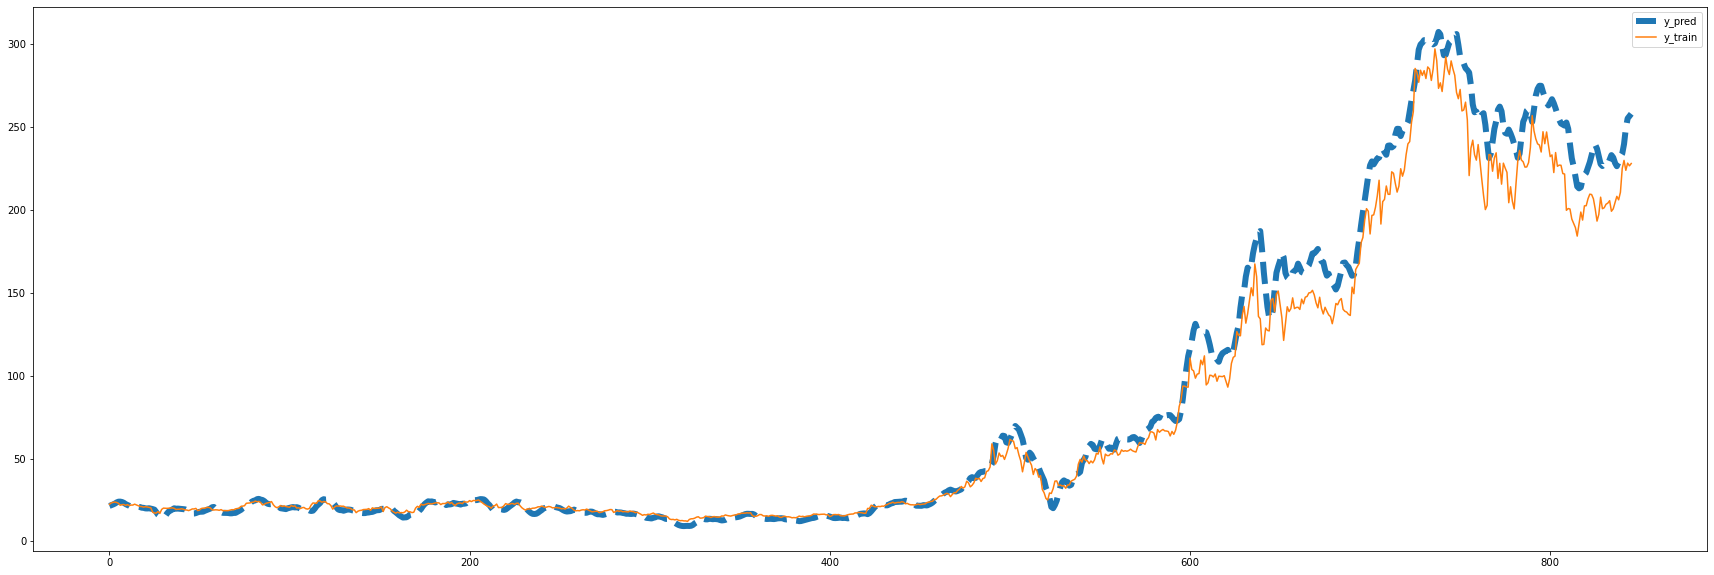

In [34]:
plt.figure(figsize = (30,10))
plt.plot(y_pred, ls = '--', label = 'y_pred', lw = 6)
plt.plot(y_train, label = 'y_train')
plt.legend()
plt.show()

In [35]:
val = val_data.values.reshape(-1,1)
val

array([[226.32666016],
       [227.23666382],
       [221.42333984],
       [209.45666504],
       [217.72666931],
       [220.7333374 ],
       [228.77333069],
       [223.58332825],
       [219.46333313],
       [218.22666931],
       [209.96333313],
       [217.33000183],
       [219.86999512],
       [218.81333923],
       [215.45333862],
       [216.99000549],
       [221.1333313 ],
       [215.66667175],
       [216.59666443],
       [223.91999817],
       [233.33332825],
       [239.66667175],
       [237.        ],
       [238.66667175],
       [237.30000305],
       [236.72332764],
       [237.99667358],
       [237.57000732],
       [235.44667053],
       [241.23666382],
       [235.02333069],
       [224.22000122],
       [223.25      ],
       [226.07000732],
       [227.6166687 ],
       [228.47999573],
       [236.89332581],
       [235.67666626],
       [236.10333252],
       [235.        ],
       [238.24000549],
       [244.33332825],
       [244.69332886],
       [244

In [36]:
scaled_valset = scaler.fit_transform(val)

In [37]:
xval_train = []
yval_train = []
step = 50

for i in range(step, val_length):
    xval_train.append(scaled_valset[i-step:i,0])
    yval_train.append(scaled_valset[i,0])

In [38]:
X_val, y_val = np.array(xval_train), np.array(yval_train)

In [39]:
X_val = np.reshape(X_val, (X_val.shape[0],X_val.shape[1],1))  # reshape to 3D array
y_val = np.reshape(y_val, (-1,1))

In [40]:
y_pred_val = model.predict(X_val)

11/11 [==============================] - 0s 6ms/step


In [41]:
y_pred_val = scaler.inverse_transform(y_pred_val)

In [42]:
y_val_is = scaler.inverse_transform(y_val)

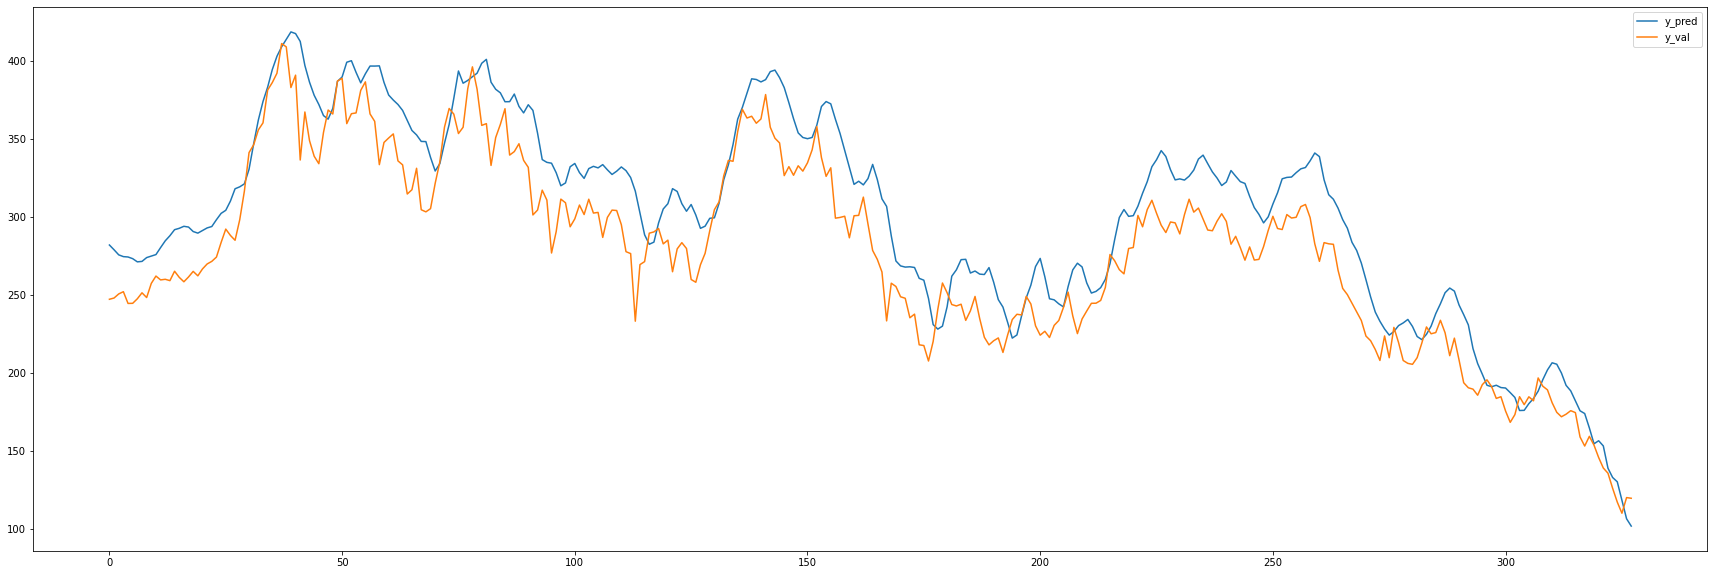

In [43]:
plt.figure(figsize = (30,10))
plt.plot(y_pred_val, label = 'y_pred')
plt.plot(y_val_is, label = 'y_val')
plt.legend()
plt.show()

# Future Price Prediction 

Which day is the last day in our data?

In [44]:
df.iloc[-1]

Open         1.199500e+02
High         1.244800e+02
Low          1.197500e+02
Close        1.231800e+02
Adj Close    1.231800e+02
Volume       1.577773e+08
Name: 2022-12-30 00:00:00-05:00, dtype: float64

1) We can predict the open price for the day after 30/12/2022--> for 3/18/2017

2) We will use last 50 days Open price as input of our model for this prediction

3) Let us prepare it:

In [45]:
time_step=50
X_input = df.iloc[-time_step:].Open.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.79167338],
        [0.77663699],
        [0.77178662],
        [0.80638645],
        [0.88156824],
        [0.96540017],
        [0.93007269],
        [0.93645917],
        [1.        ],
        [0.93524649],
        [0.81657234],
        [0.90743738],
        [0.79466444],
        [0.67639452],
        [0.65020208],
        [0.64308806],
        [0.61156022],
        [0.66628943],
        [0.69143091],
        [0.65610342],
        [0.59506876],
        [0.60388037],
        [0.52950691],
        [0.47113989],
        [0.51107523],
        [0.60396117],
        [0.56273246],
        [0.60339535],
        [0.58270001],
        [0.70113177],
        [0.65828615],
        [0.63936945],
        [0.57291835],
        [0.52287791],
        [0.49999997],
        [0.51325785],
        [0.53152793],
        [0.52158443],
        [0.39531123],
        [0.34834278],
        [0.39846402],
        [0.35286985],
        [0.28860148],
        [0.23435729],
        [0.20735651],
        [0

In [46]:
simple_RNN_prediction = scaler.inverse_transform(model.predict(X_input))
print("Simple RNN, Open price prediction for 1/01/2023      :", simple_RNN_prediction[0,0])


1/1 [==============================] - 0s 20ms/step
Simple RNN, Open price prediction for 1/01/2023      : 103.093315
